# Instalando Bibliotecas

In [1]:
import cv2
import numpy as np
import os
import glob
import pandas as pd
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
from google.colab.patches import cv2_imshow # for image display

### biblioteca para extração de descritores de haralick

In [2]:
!pip install mahotas==1.4.11
import mahotas as mt

     |████████████████████████████████| 5.7 MB 5.2 MB/s 


# Dataset

In [3]:
!gdown --id 1ZIcOVraxDcCN7jV-LLmidbaSnOSA0BJV

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1ZIcOVraxDcCN7jV-LLmidbaSnOSA0BJV
To: /content/dataset_covid_atividade.zip
100% 38.2M/38.2M [00:00<00:00, 121MB/s] 


In [ ]:
!unzip dataset_covid_atividade.zip

# Gerando o dataset

In [5]:
from os import listdir
from os.path import isfile, join
mypath = 'dataset_covid_atividade/covid'
covid_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [6]:
from os import listdir
from os.path import isfile, join
mypath = 'dataset_covid_atividade/non-covid'
non_covid_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [7]:
dataset = []
for img_url in non_covid_files:
  try:
    image = io.imread('dataset_covid_atividade/non-covid/'+img_url) 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    dataset.append(image)
  except:
    print('Warning: ',img_url)

In [8]:
for img_url in covid_files:
  try:
    image = io.imread('dataset_covid_atividade/covid/'+img_url) 
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    dataset.append(image)
  except:
    print('Warning: ',img_url)

### Exemplo - Raio-X Covid

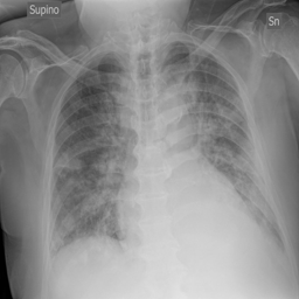

In [9]:
img = cv2.imread('dataset_covid_atividade/covid/COVID-10.png')
cv2_imshow(img)

### Exemplo - Raio-X Non-Covid

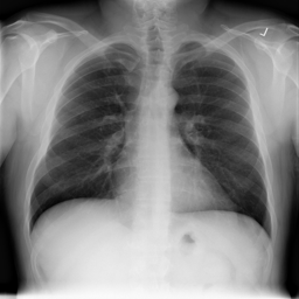

In [10]:
img = cv2.imread('dataset_covid_atividade/non-covid/Normal-10.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

# Pré-processando via Descritores de Texturas

In [11]:
def extract_features(image):
        # calculate haralick texture features for 4 types of adjacency
        textures = mt.features.haralick(image)
        ht_mean = textures.mean(axis=0)
        return ht_mean


In [12]:
from tqdm.notebook import tqdm
X = []
for image in tqdm(dataset):
  textures = extract_features(image)
  X.append(textures)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [13]:
Y = ['non_covid']*500 + ['covid']*500

In [14]:
df_data = pd.DataFrame(X)
df_data['labels'] = Y

df_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,labels
0,0.002767,64.653463,0.989317,3033.132357,0.325616,246.061364,12067.875964,8.341927,11.540008,0.000648,3.531015,-0.452610,0.998799,non_covid
1,0.007956,83.487809,0.990370,4340.500540,0.342478,241.073365,17278.514352,8.335086,11.531173,0.000633,3.650711,-0.459019,0.998965,non_covid
2,0.003443,68.139616,0.988010,2848.332447,0.346023,243.602747,11325.190174,8.228591,11.327943,0.000696,3.464418,-0.458842,0.998806,non_covid
3,0.006156,52.908497,0.992994,3783.860456,0.374247,273.719328,15082.533327,8.214091,11.094541,0.000726,3.310970,-0.491242,0.999285,non_covid
4,0.006913,54.139955,0.991921,3355.826252,0.374847,245.416354,13369.165051,8.160218,11.125202,0.000735,3.411758,-0.475996,0.999085,non_covid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.004830,19.649601,0.997250,3576.795515,0.517530,274.962032,14287.532460,8.144715,10.167138,0.001031,2.680241,-0.605226,0.999876,covid
996,0.002091,56.539007,0.985836,1999.364107,0.443051,313.922541,7940.917421,7.941303,10.334923,0.001081,2.847834,-0.529979,0.999501,covid
997,0.002348,64.348168,0.984647,2105.460403,0.416527,305.894444,8357.493443,7.986364,10.482487,0.000920,2.826666,-0.522296,0.999460,covid
998,0.008563,30.514196,0.995969,3786.691795,0.459135,318.384087,15116.252983,8.321598,10.603651,0.000909,2.748584,-0.580627,0.999850,covid


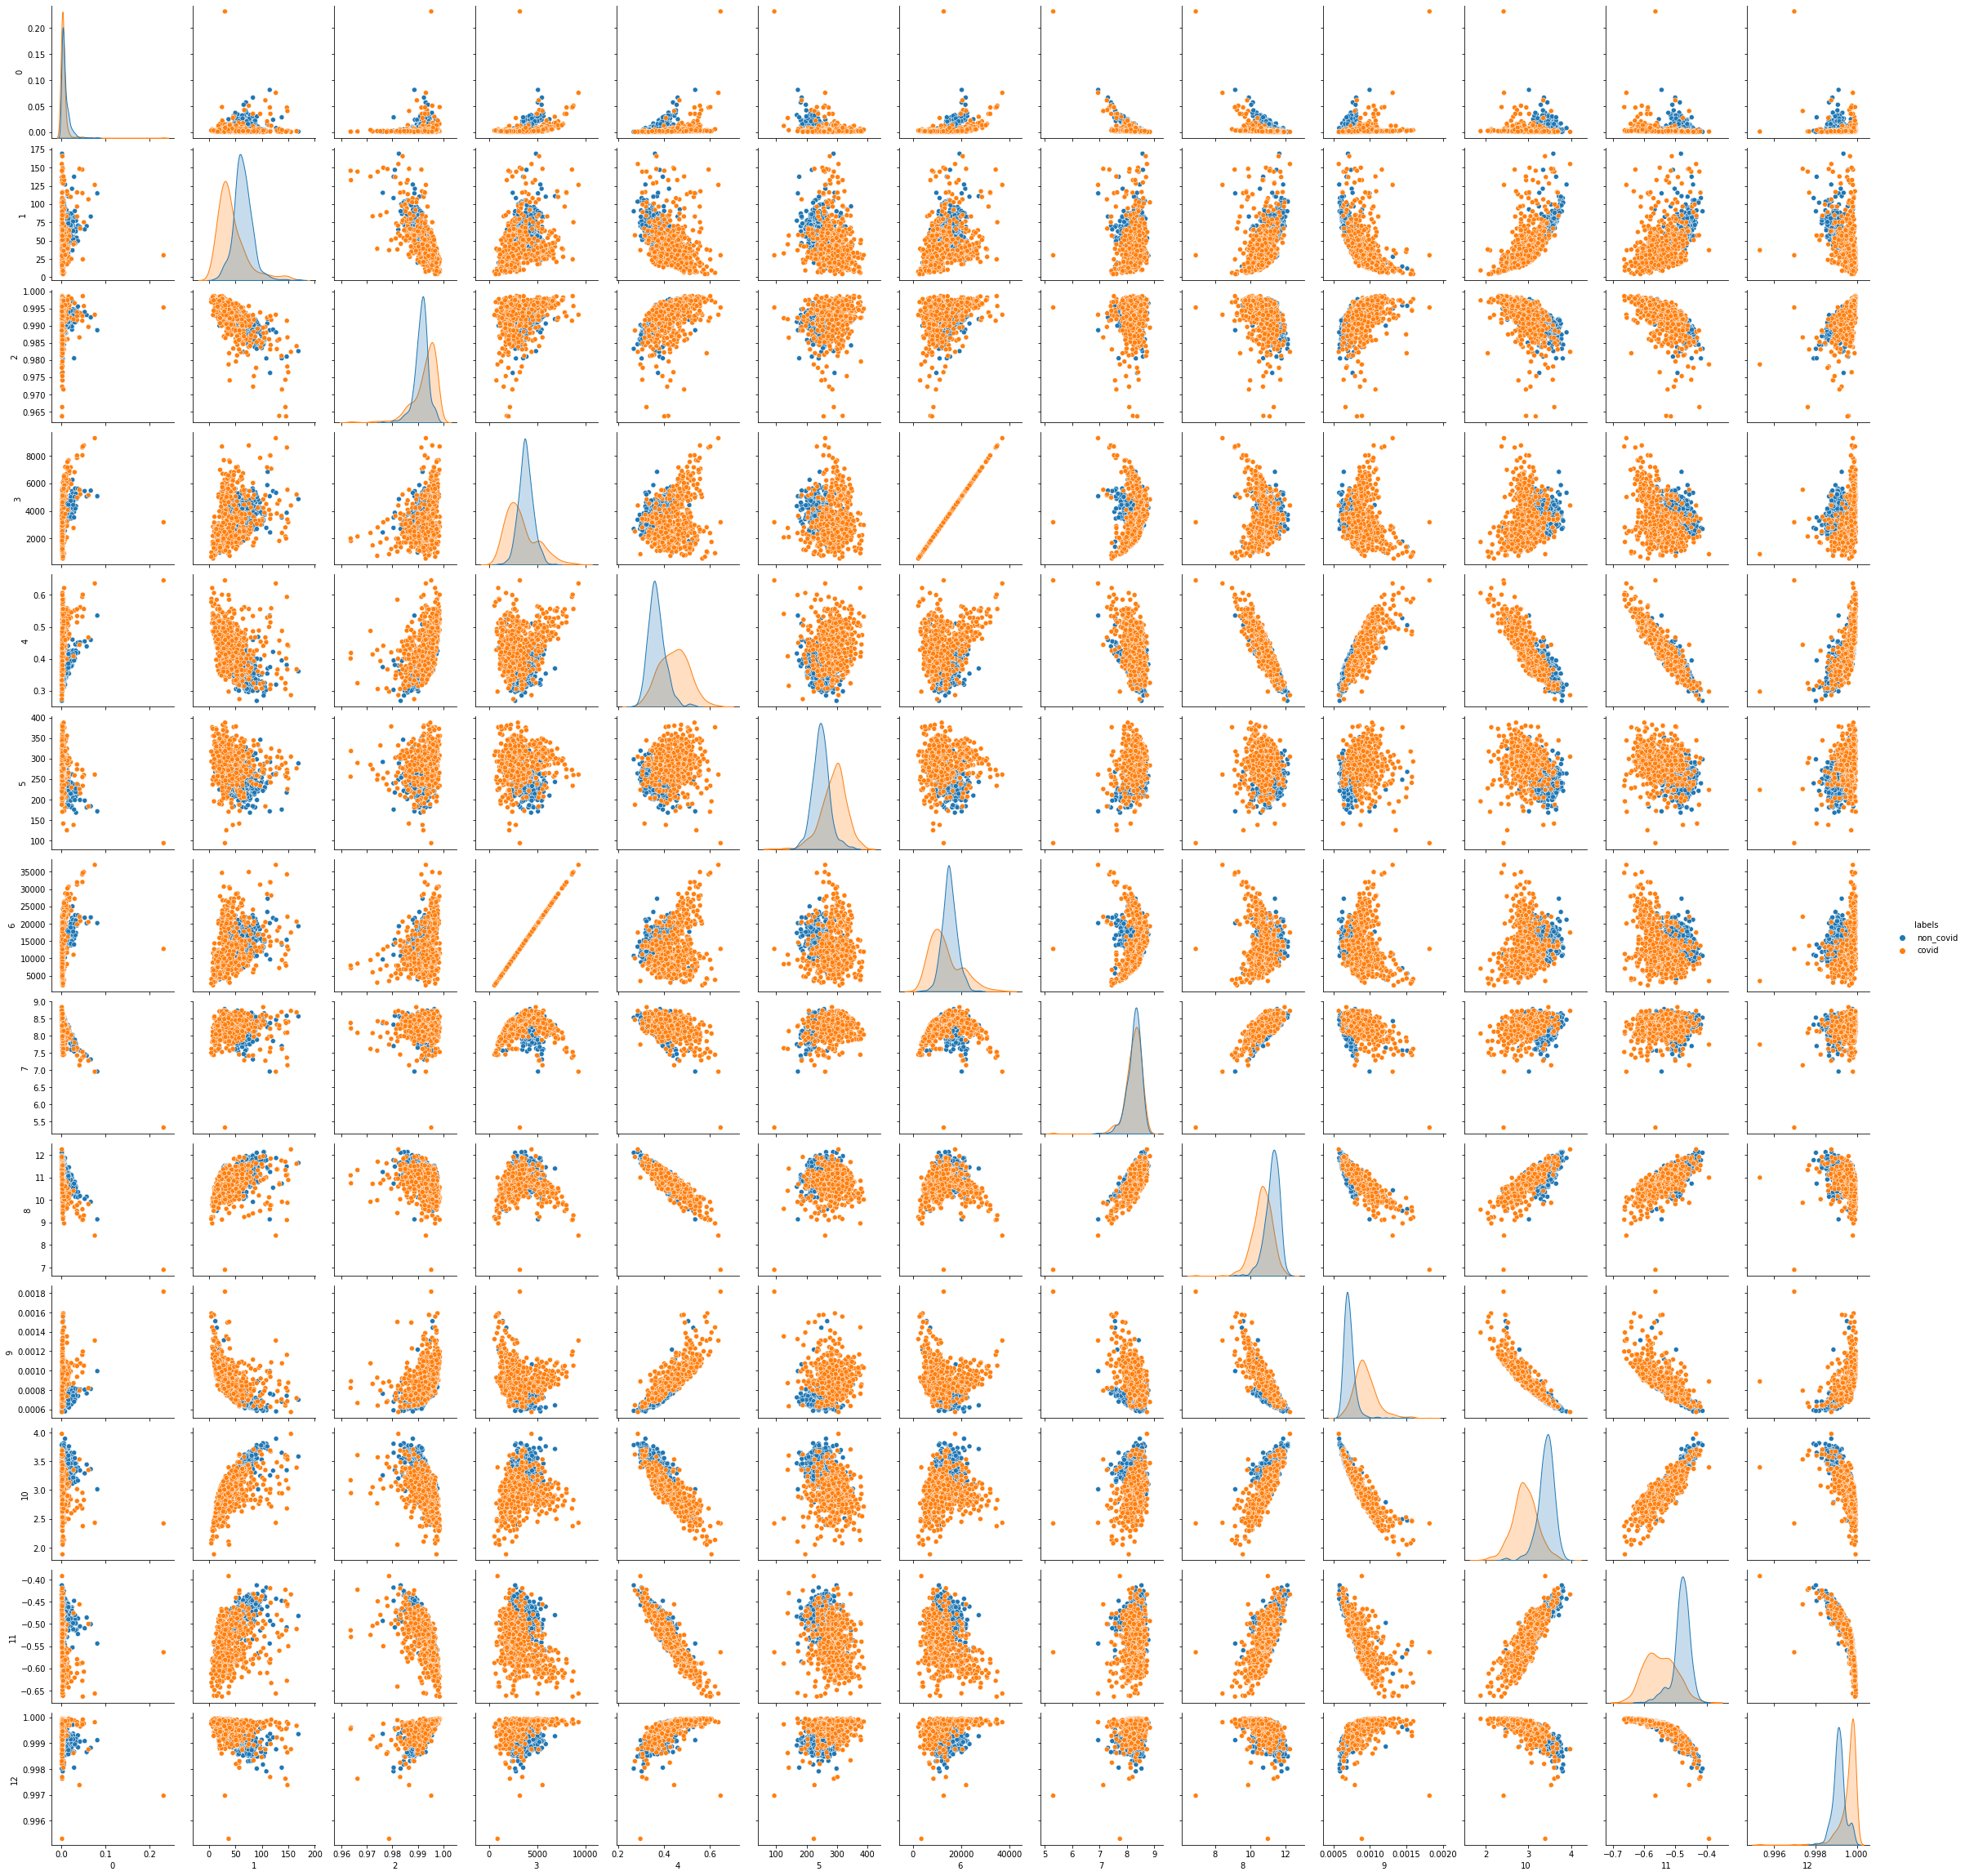

In [15]:
import seaborn as sns


sns.pairplot(df_data, hue="labels")

# Atividade

* 1. Escolher dois descritores de textura de Haralick (cada coluna é um descritor).
* 2. Dividir o conjunto de dados com 80% de treinamento e 20% de teste.
* 3. Avaliar a classificação a partir dos dois descritores utilizados.

1 - Escolhi os descritores 5 e 10, devido a suas distribuições demonstrarem terem maior diferença entre os dois targets.


In [16]:
dataset = df_data[[5,10,'labels']]

2 -

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

dataset[5] = mms.fit_transform(dataset[[5]])
dataset[10] = mms.fit_transform(dataset[[10]])

df_train, df_test = train_test_split(dataset, test_size=0.20, random_state=42)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


3 -

In [18]:
X_train = df_train[[5,10]] 
y_train = df_train[['labels']]

X_test = df_test[[5,10]] 
y_test = df_test[['labels']]

In [19]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

print('Acurácia: ',neigh.score(X_test,y_test))

Acurácia:  0.88


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [20]:
neigh.score(X_test,y_test)

0.88

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression(solver = 'lbfgs', multi_class = 'auto', max_iter = 1000)
model.fit(X_train, y_train)

print('Acurácia: ', model.score(X_test, y_test))

Acurácia:  0.88


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


A acurácia do modelo de regressão logística foi muito bom, com valor de 91%

Refazer: utilizar outras métricas de
classificação a partir da função classification report 